# **1M MovieLens Data Set Exploration**

In [56]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link1 = 'https://drive.google.com/file/d/1-KyOChgw269CpP7SOW8NXAAZIdBl5JBv/view?usp=sharing'

link2='https://drive.google.com/file/d/1-Qkg284DCAUX_Kcg7DGr67r22NSK40AI/view?usp=sharing'

link3='https://drive.google.com/file/d/1-LoCHixVCmZiIsPHRij-6D-KFU40oqJ7/view?usp=sharing'
  
# to get the id part of the file
id1 = link1.split("/")[-2]
id2 = link2.split("/")[-2]
id3 = link3.split("/")[-2]

downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('ratings.dat')  
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('users.dat')  
downloaded3 = drive.CreateFile({'id':id3}) 
downloaded3.GetContentFile('movies.dat')  

ratings = pd.read_csv( 'ratings.dat', 
        delimiter='::',
        header=None,
        names=['user_id','item_id','rating','timestamp'],
        engine='python')

users = pd.read_csv( 'users.dat', 
        delimiter='::',
        header=None,
        names=['user_id','gender','age','occupation','zip code'],
        engine='python')

items = pd.read_csv( 'movies.dat', 
        delimiter='::',
        header=None,
        names=['movie_title with year','genres'],engine='python',encoding='latin-1')

ratings.head(4)
users.head(4)
items.head(4)

,movie_title with year,genres
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama


In [18]:
users.shape,items.shape,ratings.shape

((6040, 5), (3883, 2), (1000209, 4))

In [25]:
# visual
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# ml
import numpy as np
import scipy as sp
import pandas as pd


# **Explore ratings data:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


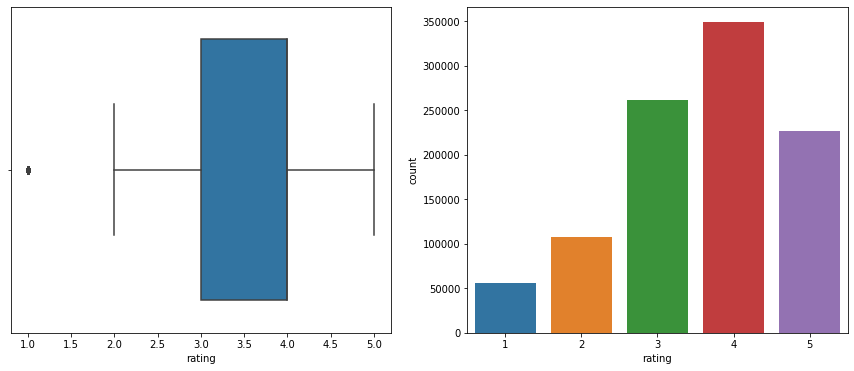

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,6))
sns.boxplot(ratings.rating,ax=axes[0])
sns.countplot(ratings.rating,ax=axes[1])
plt.show()

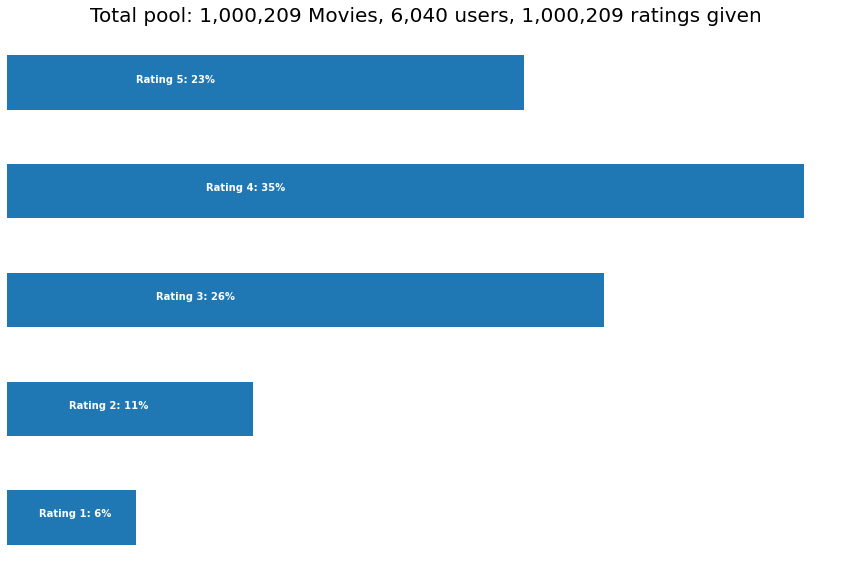

In [21]:
p = ratings.groupby('rating')['rating'].agg(['count'])
movie_count = ratings.item_id.count()
cust_count = ratings.user_id.nunique() 
rating_count = ratings.user_id.count()

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} users, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

**Distribution of number of ratings per user\item**

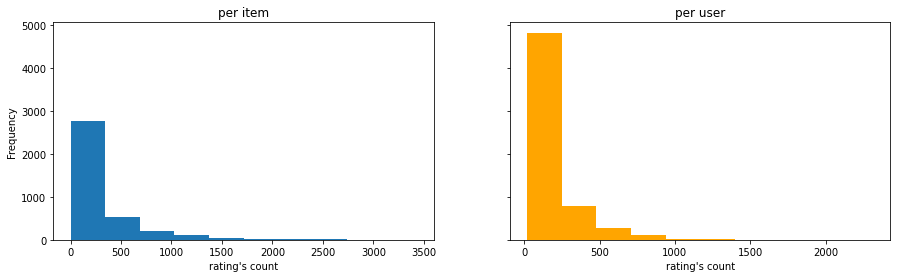

In [23]:
ratings_pv = ratings.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 4))

ratings_pv.astype(bool).sum(axis=0).plot.hist(ax=ax[0])
ratings_pv.astype(bool).sum(axis=1).plot.hist(ax=ax[1],color='orange')
ax[0].set_title('per item')
ax[1].set_title('per user')
ax[0].set_xlabel('rating\'s count')
ax[1].set_xlabel('rating\'s count');

**Movie ratings aggregated by user**

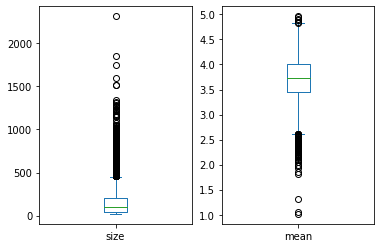

In [26]:
userRatingsAggr = ratings.groupby(['user_id']).agg({'rating': [np.size, np.mean]})
userRatingsAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
userRatingsAggr['rating'].plot(kind='box', subplots=True)
plt.show();

**Calculate the dataset sparsity:**

In [27]:
matrix_sparsity =  round((1-np.count_nonzero(ratings_pv)/ratings_pv.size)*100,2)
print('Sparsity is equal to {}%'.format(str(matrix_sparsity)) )

Sparsity is equal to 95.53%


# **Books Data Set Exploration**

In [57]:

link4 = 'https://drive.google.com/file/d/1Vouyzr_R7St_EiR5LMCs9rpCChXWCWJ-/view?usp=sharing'

link5='https://drive.google.com/file/d/1VuT_q6IuxEri8nH8URxfhYsWDz7prDLF/view?usp=sharing'

link6='https://drive.google.com/file/d/1Vptgt-BkxI05ceWmIdj4tZhqS4iDRxAl/view?usp=sharing'
  
# to get the id part of the file
id4 = link4.split("/")[-2]
id5 = link5.split("/")[-2]
id6 = link6.split("/")[-2]

downloaded4 = drive.CreateFile({'id':id4}) 
downloaded4.GetContentFile('BX-Book-Ratings.csv')  
downloaded5 = drive.CreateFile({'id':id5}) 
downloaded5.GetContentFile('BX-Users.csv')  
downloaded6 = drive.CreateFile({'id':id6}) 
downloaded6.GetContentFile('BX_Books.csv')  

#Ratings
# r_cols = ['user_id', 'isbn', 'rating']
ratings_bk = pd.read_csv('BX-Book-Ratings.csv', sep=';',header=[0], encoding='latin-1',low_memory=False)

#Users
# u_cols = ['user_id', 'location', 'age']
users_bk = pd.read_csv('BX-Users.csv', sep=';', header=[0], encoding='latin-1',low_memory=False)

#Books
# i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items_bk = pd.read_csv('BX_Books.csv', sep=';', encoding='latin-1',low_memory=False,on_bad_lines='skip')

# ratings_bk.head(4)
# users_bk.head(4)
# items_bk.head(4)

In [58]:
ratings_bk.shape,users_bk.shape,items_bk.shape

((1149780, 3), (278858, 3), (271360, 8))

In [59]:
items_bk.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


**Changing datatypes and replacing nan values**

In [60]:
users_bk['Age'] = users_bk['Age'].astype(float)
users_bk['User-ID'] = users_bk['User-ID'].astype(int)
ratings_bk['User-ID'] = ratings_bk['User-ID'].astype(int)
ratings_bk['Book-Rating'] = ratings_bk['Book-Rating'].astype(int)



In [61]:
df = pd.merge(users_bk, ratings_bk, on='User-ID')
df = pd.merge(df, items_bk, on='ISBN')
df.head(10)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
6,85526,"victoria, british columbia, canada",36.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
7,96054,"ottawa, ontario, canada",29.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
8,116866,"ottawa, ,",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
9,123629,"kingston, ontario, canada",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


**Rating Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


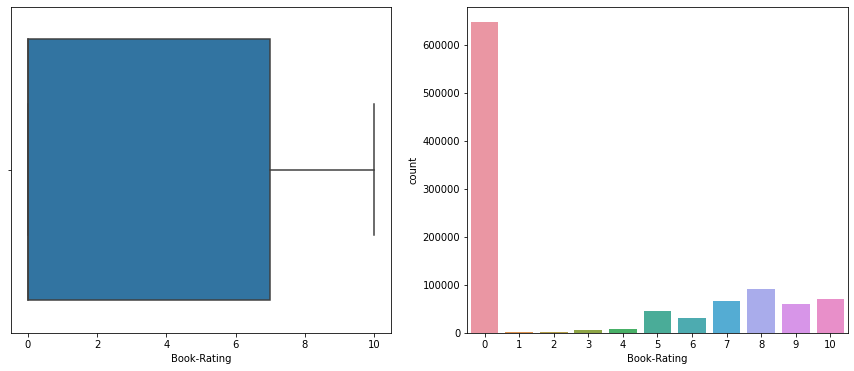

In [65]:
f, axes = plt.subplots(1, 2,figsize=(15,6))
sns.boxplot(df['Book-Rating'],ax=axes[0])
sns.countplot(df['Book-Rating'],ax=axes[1])
plt.show()

In [66]:
df['Book-Rating'].value_counts()
#Lots of zero ratings

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

**Explicit Rating Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


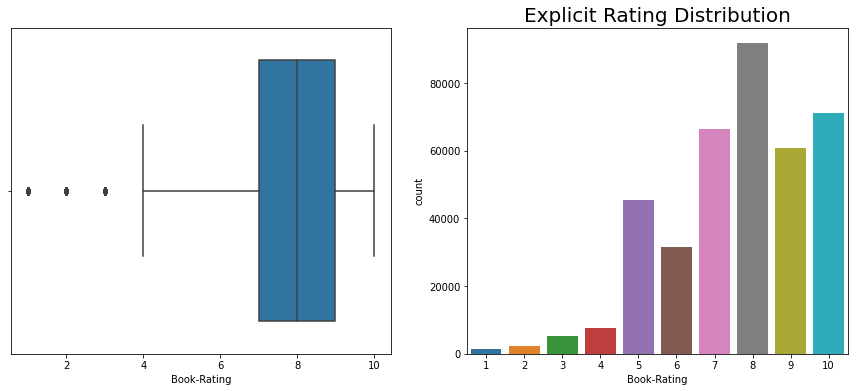

In [70]:
df_v=df[['Book-Rating']].copy()
df_v.dtypes
df_v = df_v[df_v['Book-Rating'] != 0]
f, axes = plt.subplots(1, 2,figsize=(15,6))
sns.countplot(x='Book-Rating',data=df_v)
plt.title('Explicit Rating Distribution',size=20)
sns.boxplot(df_v['Book-Rating'],ax=axes[0])
plt.show()

# **We will manipulate the original Books data set to include items and users with enough ratings for analysys **

In [79]:
# Remove users with less than 10 ratings and items with 5 ratings
mask = ratings_bk['Book-Rating'] > 0
ratings = ratings_bk.loc[mask]
mask_users = ratings_bk['User-ID'].isin(ratings_bk['User-ID'].value_counts()[ratings_bk['User-ID'].value_counts()>10].index)
mask_items = ratings_bk['ISBN'].isin(ratings_bk['ISBN'].value_counts()[ratings_bk['ISBN'].value_counts()>5].index)
ratings = ratings.loc[mask_users & mask_items]

print(f'Number of users: {ratings["User-ID"].nunique()}')
print(f'Number of items: {ratings["ISBN"].nunique()}')

Number of users: 11116
Number of items: 32011


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


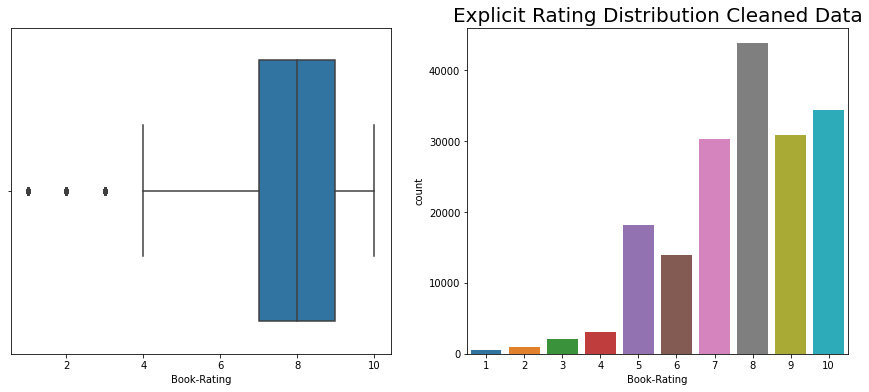

In [94]:
df_v=ratings[['Book-Rating']].copy()
df_v
f, axes = plt.subplots(1, 2,figsize=(15,6))
sns.countplot(df_v['Book-Rating'],data=df_v)
plt.title('Explicit Rating Distribution Cleaned Data',size=20)
sns.boxplot(df_v['Book-Rating'],ax=axes[0])
plt.show()

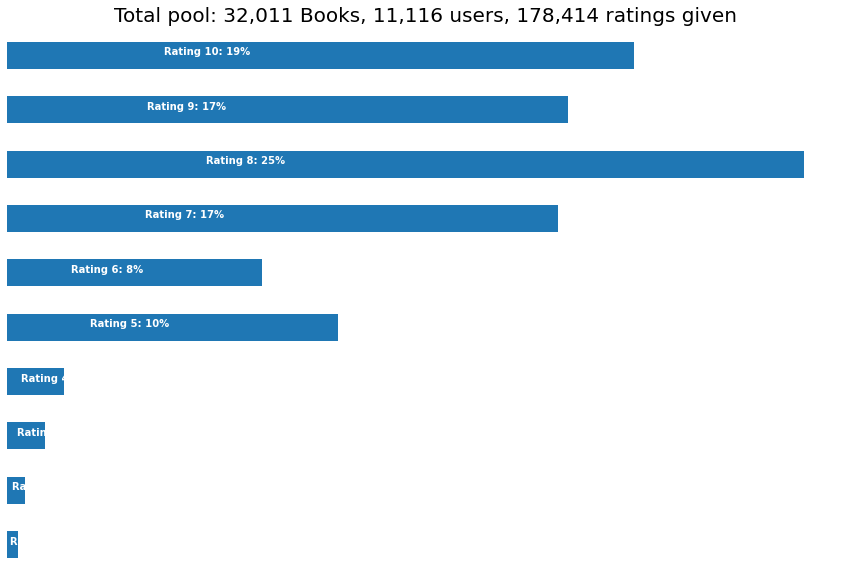

In [120]:
p = ratings.groupby('Book-Rating')['Book-Rating'].agg(['count'])
books_count = ratings.ISBN.nunique() 
cust_count = ratings['User-ID'].nunique() 


ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Books, {:,} users, {:,} ratings given'.format(books_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,11):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

**Distribution of number of ratings per user\item for Cleaned Data**

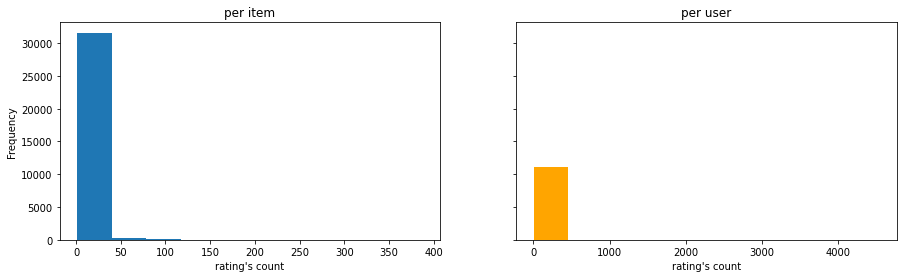

In [97]:
ratings_pv = ratings.pivot(index = 'User-ID', columns ='ISBN', values = 'Book-Rating').fillna(0)


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 4))

ratings_pv.astype(bool).sum(axis=0).plot.hist(ax=ax[0])
ratings_pv.astype(bool).sum(axis=1).plot.hist(ax=ax[1],color='orange')
ax[0].set_title('per item')
ax[1].set_title('per user')
ax[0].set_xlabel('rating\'s count')
ax[1].set_xlabel('rating\'s count');

**Books ratings aggregated by user for Cleaned Data**

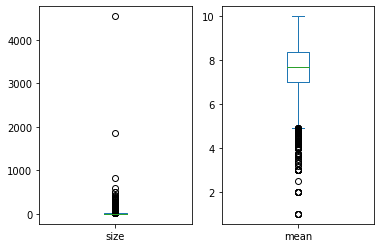

In [98]:
userRatingsAggr = ratings.groupby(['User-ID']).agg({'Book-Rating': [np.size, np.mean]})
userRatingsAggr.reset_index(inplace=True)  # To reset multilevel (pivot-like) index
userRatingsAggr['Book-Rating'].plot(kind='box', subplots=True)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


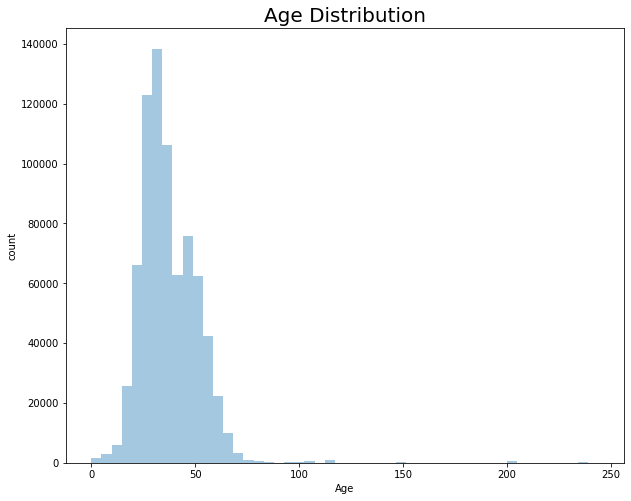

In [99]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'],kde=False)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

**Top 25 Books**

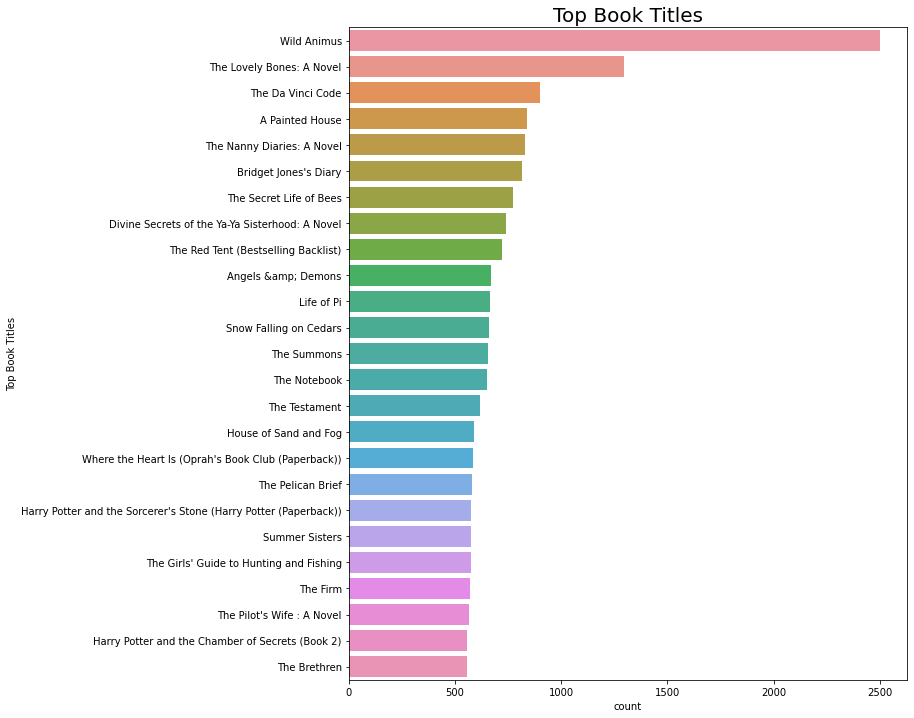

In [106]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()


barplot(df,'Book-Title','Top Book Titles')

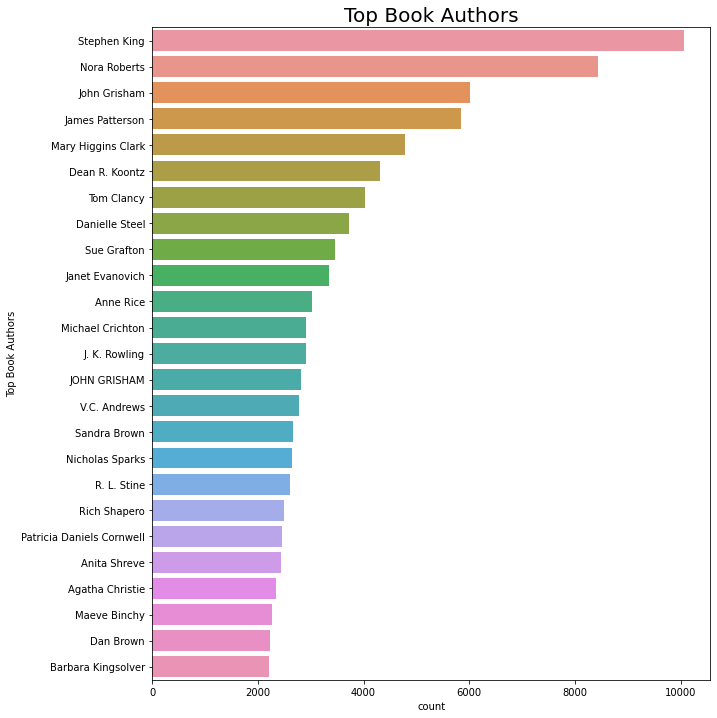

In [107]:
barplot(df,'Book-Author','Top Book Authors')

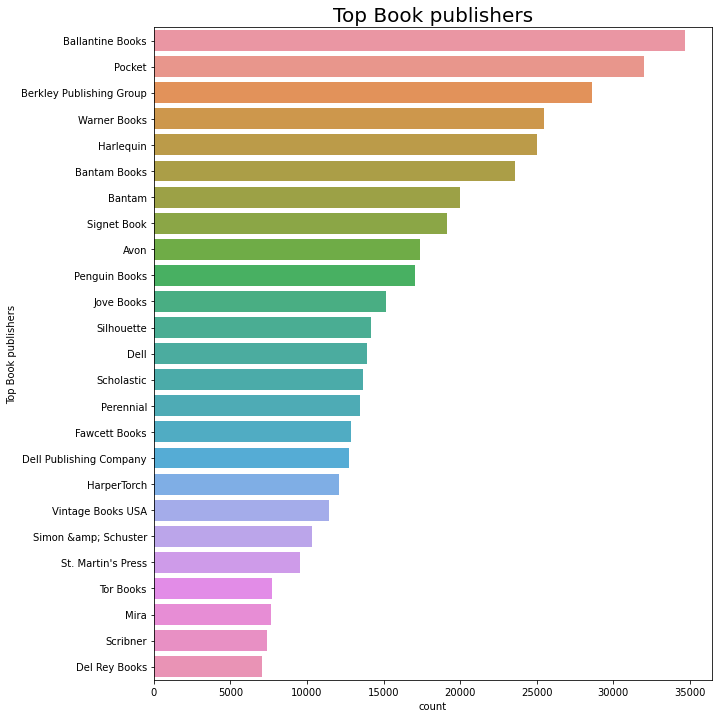

In [121]:
barplot(df,'Publisher','Top Book publishers')

In [109]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

**Wordcloud of book titles**




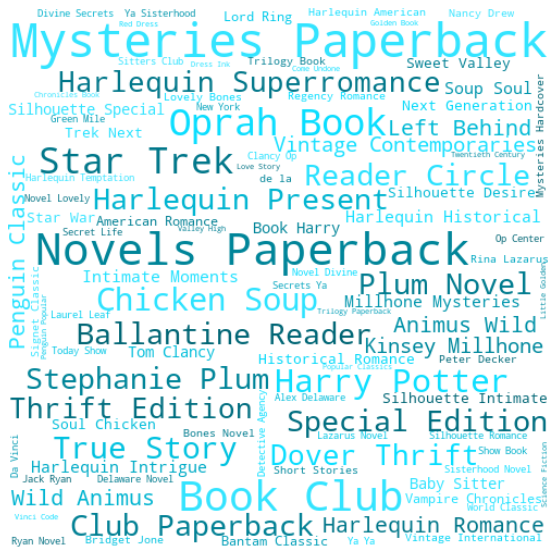

In [112]:
from wordcloud import WordCloud,STOPWORDS

plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['Book-Title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [113]:

ratings_pv = ratings.pivot(index = 'User-ID', columns ='ISBN', values = 'Book-Rating').fillna(0)

**Calculate the Cleaned dataset sparsity:**

In [114]:
matrix_sparsity =  round((1-np.count_nonzero(ratings_pv)/ratings_pv.size)*100,2)
print('Sparsity is equal to {}%'.format(str(matrix_sparsity)) )

Sparsity is equal to 99.95%
